In [1]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import os
os.listdir('../content/')

['.config', 'drive', 'sample_data']

In [0]:
import zipfile
zip_ref=zipfile.ZipFile('../content/drive/My Drive/Dataset/assignment.zip','r')
zip_ref.extractall('tem')
# zip_ref=zipfile.ZipFile('../content/tem/test1.zip','r')
# zip_ref.extractall('test')
# zip_ref=zipfile.ZipFile('../content/tem/train.zip','r')
# zip_ref.extract('train')
# zip_ref=zipfile.ZipFile('../content/tem/validation.zip','r')
# zip_ref.extract('validation')
zip_ref.close()


In [0]:
# !cp -av /content/result/cat/ '/content/drive/My Drive/Dataset/'

cp: cannot stat '/content/result/cat/': No such file or directory


In [5]:
import time
import os
start_time = time.time()
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
 
# The GPU id to use, usually either "0" or "1";
os.environ["CUDA_VISIBLE_DEVICES"]="0";  
 
# Do other imports now...
import keras
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

from keras.preprocessing.image import ImageDataGenerator

train_datagen= ImageDataGenerator(rescale=1./255,rotation_range=180)
validation_datagen= ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory('../content/tem/train',target_size=(224,224),batch_size=64,class_mode='binary')
validation_generator=validation_datagen.flow_from_directory('../content/tem/validation',target_size=(224,224),batch_size=32,class_mode='binary')

end_time = time.time()
print('Time to load Images to Tensor: %f ms' % ((end_time - start_time) * 1000))


Found 19652 images belonging to 2 classes.
Found 5348 images belonging to 2 classes.
Time to load Images to Tensor: 846.239090 ms


In [0]:
# import os
# # import os
# # os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
 
# # # The GPU id to use, usually either "0" or "1";
# # os.environ["CUDA_VISIBLE_DEVICES"]="0";  
 
# # # Do other imports now...
# # import keras
# from keras.preprocessing import image
# import matplotlib.pyplot as plt
# # os.listdir('../content/result/dog')
# #print first 30 samples
# path_to_dog='../content/result/dog'
# z=0
# plt.figure(figsize=(30,30))
# for file in os.listdir(path_to_dog) :
#   if(z>=100):
#     break
#   plt.subplot(10,10,z+1)
#   plt.xticks([])
#   plt.yticks([])
#   plt.grid(False)
#   img=image.load_img('../content/result/dog/'+file,target_size=(224,224))
#   img= np.asarray(img)
# #   img= np.expand_dims(img,axis=0)
#   plt.imshow(img)
#   img= np.expand_dims(img,axis=0)
# #   plt.imshow()
#   plt.xlabel(file)
#   z=z+1
# #   plt.show()

In [6]:
start_time = time.time()

from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.applications import VGG16
base_model=VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(units=512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=256,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.summary()

end_time = time.time()
print('Time to build model in Tensorflow: %f ms' % ((end_time - start_time) * 1000))





# model.add(Dense(units=4096,activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(units=2048,activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(units=1024,activation='relu'))
# model.add(Dropout(0.5))





58892288/58889256 [==============================] - 1s 0us/step







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               12845568  
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_____________________________________________________________



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/30
10/10 [==============================] - 15s 2s/step - loss: 0.7362 - acc: 0.4922 - val_loss: 0.6579 - val_acc: 0.6156

Epoch 00001: val_acc improved from -inf to 0.61562, saving model to vgg16_1.h5
Epoch 2/30
10/10 [==============================] - 8s 764ms/step - loss: 0.6628 - acc: 0.5906 - val_loss: 0.6609 - val_acc: 0.5687

Epoch 00002: val_acc did not improve from 0.61562
Epoch 3/30
10/10 [==============================] - 10s 954ms/step - loss: 0.6502 - acc: 0.6078 - val_loss: 0.5785 - val_acc: 0.6969

Epoch 00003: val_acc improved from 0.61562 to 0.69688, saving model to vgg16_1.h5
Epoch 4/30
10/10 [==============================] - 10s 958ms/step - loss: 0.6015 - acc: 0.6859 - val_loss: 0.4932 - val_acc: 0.7625

Epoch 00004: val_acc improved from 0.69688 to 0.76250, saving model to vgg16_1.h5
Epoch 5/30
10/10 [==============================] - 9s 940ms/step - loss: 0.5

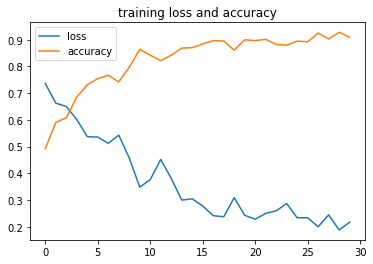

Time to train model in Tensorflow: 294978.976965 ms


In [7]:
import time

start_time = time.time()

from keras.optimizers import SGD
sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd,loss='binary_crossentropy',metrics=['accuracy'])
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", 
                             monitor='val_acc', 
                             verbose=1, 
                             save_best_only=True, 
                             save_weights_only=False, 
                             mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', 
                      min_delta=0, 
                      patience=20, 
                      verbose=1, 
                      mode='auto')
_history = model.fit_generator(train_generator,
                              steps_per_epoch=10,
                              epochs=30,
                              verbose=1,
                              validation_data = validation_generator,
                              validation_steps=10,
                              callbacks=[checkpoint,early])

# torch.cuda.empty_cache()
plt.plot(_history.history['loss'], label='loss')
plt.plot(_history.history['acc'], label='accuracy')
plt.legend()
plt.title('training loss and accuracy')
plt.show()

end_time = time.time()
print('Time to train model in Tensorflow: %f ms' % ((end_time - start_time) * 1000))

In [0]:
# from keras.callbacks import ModelCheckpoint, EarlyStopping
# checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
# early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')
# history = model.fit_generator(train_generator,steps_per_epoch=10,epochs=30,verbose=1,validation_data = validation_generator,validation_steps=10,callbacks=[checkpoint,early])

In [0]:
# from keras.preprocessing import image
# import matplotlib.pyplot as plt
# path='../content/tem/test1/45.jpg'
# # for img in os.listdir(path):
# img=image.load_img(path,target_size=(224,224))
# img= np.asarray(img)
# plt.imshow(img)
# img= np.expand_dims(img,axis=0)
# if model.predict(img) == 0:
#   print("Cat")
# else:
#   print('Dog')
#print first 30 samples
# plt.figure(figsize=(10,10))
# for i in range(30):
#   plt.subplot(6,5,i+1)
#   plt.xticks([])
#   plt.yticks([])
#   plt.grid(False)
#   plt.imshow(training_images[i].squeeze(), cmap=plt.cm.binary)
#   plt.xlabel(training_labels[i])
# plt.show()
# model.save('model_1.h5')
# import shutil, glob
# dst = '../content/tem/test1'
# try:
#   os.makedirs('../content/result/cat')
#   os.makedirs('../content/result/dog')
# except:
#   pass
# for file in os.listdir(dst):
#   img=image.load_img('../content/tem/test1/'+file,target_size=(224,224))
#   img=np.asarray(img)
#   img=np.expand_dims(img,axis=0)
#   if model.predict(img) == 0:
#     shutil.copy2('../content/tem/test1/'+file,'../content/result/cat')
#   else: 
#     shutil.copy2('../content/tem/test1/'+file,'../content/result/dog')
  

In [8]:
start_time = time.time()

import numpy as np
Dir='../content/tem/test1/'
plt.figure(figsize=(30,20))
for i in range(1,100):
  plt.subplot(10,10,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  path='../content/tem/test1/'+str(i)+'.jpg'
  img=image.load_img(path,target_size=(224,224))
  img= np.asarray(img)
  plt.imshow(img)
  img= np.expand_dims(img,axis=0)
  if model.predict(img) == 0:
    plt.xlabel('Pic '+ str(i) + ': Cat')
  else:
    plt.xlabel('Pic '+ str(i) + ': Dog')

end_time = time.time()
print('Time to train model in Tensorflow: %f ms' % ((end_time - start_time) * 1000))

Output hidden; open in https://colab.research.google.com to view.